In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy as sci
import matplotlib

import analysis as ana
import plot as pl

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [4]:
import matplotlib as mpl
from matplotlib import rc

rc('text', usetex=False)
font = {'family':'CMU Serif', 
               #'sans-serif':['Helvetica'],
               'size': 11}
mpl.rc('font', **font)

In [19]:
clu_all = pd.read_csv('clu_results/clu_results_all.txt', index_col=0)
clu_pat = pd.read_csv('clu_results/clu_results_pat.txt', index_col=0)

In [20]:
clu_all_ = clu_all[clu_all.phenotype_description != 0]

In [25]:
results = pd.DataFrame()
results['color'] = clu_all_['phenotype_description']
results['source'] = clu_all_['predict_all']
results['target'] = clu_pat['predict_pat']+3
results['weight'] = [1]*109
results['color'] = np.where(clu_all_['phenotype_description'] == 1, '#910040', results['color'])
results['color'] = np.where(clu_all_['phenotype_description'] == 2, '#ff603d', results['color'])

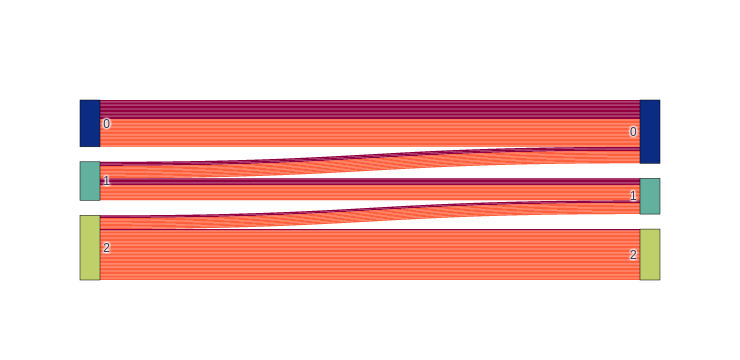

In [33]:
import plotly.graph_objects as go

color_link = results['color']

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["0", "1", "2", "0", "1", "2"],
      color = ['#0c2c84', '#64b09e', '#bfcf69','#0c2c84', '#64b09e', '#bfcf69']
    ),
    link = dict(
      source = results['source'],
      target = results['target'],
      value = results['weight'],
      color=color_link
  ))])



fig.update_layout(
    autosize=False,
    width=500,
    height=300,)
fig.write_image("fig/clu_flow_pheno.svg")
fig.show()

In [5]:
clu_all = pd.read_csv('clu_results/clu_results_all.txt', index_col=0)
clu_all_cog = pd.read_csv('clu_results/clu_results_all_cog.txt', index_col=0)

In [30]:
results = pd.DataFrame()
results['color'] = clu_all['phenotype_description']
results['source'] = clu_all_cog['predict_cog']
results['target'] = clu_all['predict_all'] +3
results['weight'] = [1]*155
results['color'] = np.where(clu_all['phenotype_description'] == 0, '#3880d9', results['color'])
results['color'] = np.where(clu_all['phenotype_description'] == 1, '#910040', results['color'])
results['color'] = np.where(clu_all['phenotype_description'] == 2, '#ff603d', results['color'])

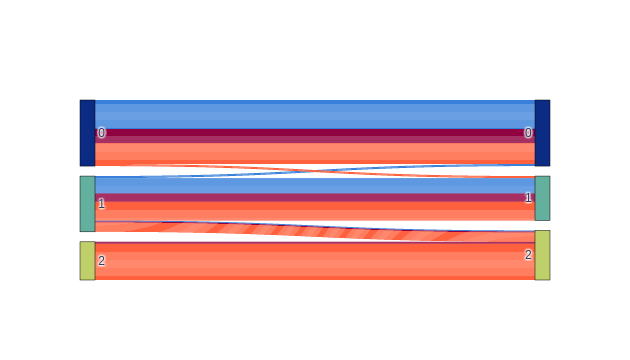

In [43]:
import plotly.graph_objects as go

color_link = results['color']

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 10,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label = ["0", "1", "2", "0", "1", "2"],
      color = ['#0c2c84', '#64b09e', '#bfcf69','#0c2c84', '#64b09e', '#bfcf69']
    ),
    link = dict(
      source = results['source'],
      target = results['target'],
      value = results['weight'],
      color=color_link
  ))])



fig.update_layout(
    autosize=False,
    width=250,
    height=250,)
fig.write_image("fig/clu_flow_pheno_all.svg")
fig.show()